# Демонстрация обучения линейной регрессии с нуля 

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
df = pd.read_csv('linear_regression_friendly_dataset.csv')
x = df['x'].values
y = df['y'].values

In [5]:
np.random.seed(12354)

w = np.random.randint(12)
w0 = np.random.randint(12)

In [6]:
def linear_regression(x,w,w0):
    return w0 + w*x

In [7]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [8]:
def mape(y_true, y_pred):
    epsilon = 1e-10
    y_true_safe = np.clip(y_true, epsilon, None)
    return np.mean(np.abs((y_true - y_pred) / y_true_safe)) * 100

In [9]:
def grad_w(x,y_true, y_pred):
    n = len(y_true)
    return (2/n) * np.sum(x * (y_pred - y_true))

In [10]:
def grad_w0(y_true, y_pred):
    n = len(y_true)
    return (2/n) * np.sum(y_pred - y_true)

In [14]:
def gradient_descent(x, y, w, w0):
    iterations = 10000
    learning_rate = 0.00001
    
    for i in range(iterations):
        y_pred = linear_regression(x=x, w=w, w0=w0)
        loss = mse(y, y_pred)
        
        w = w - learning_rate * grad_w(x=x, y_true=y, y_pred=y_pred)
        w0 = w0 - learning_rate * grad_w0(y_true=y, y_pred=y_pred)
        

        
        if i % 200 == 0 :
            mape_value = mape(y_true=y, y_pred=y_pred)
            print(f"Iter {i:4d} | Loss: {loss:.4f} | MAPE: {mape_value:.2f}% | w: {w:.4f} | w0: {w0:.4f}")
            
    return w,w0
            
new_w, new_w0 = gradient_descent(x=x, y=y, w=w, w0=w0)

pred = linear_regression(w=new_w, w0=new_w0, x=x)

Iter    0 | Loss: 1167.8956 | MAPE: 18.81% | w: 3.0391 | w0: 4.0006
Iter  200 | Loss: 27.0303 | MAPE: 5.46% | w: 3.5833 | w0: 4.0139
Iter  400 | Loss: 27.0168 | MAPE: 5.46% | w: 3.5833 | w0: 4.0191
Iter  600 | Loss: 27.0033 | MAPE: 5.45% | w: 3.5832 | w0: 4.0243
Iter  800 | Loss: 26.9899 | MAPE: 5.45% | w: 3.5831 | w0: 4.0295
Iter 1000 | Loss: 26.9765 | MAPE: 5.45% | w: 3.5830 | w0: 4.0347
Iter 1200 | Loss: 26.9631 | MAPE: 5.45% | w: 3.5830 | w0: 4.0399
Iter 1400 | Loss: 26.9497 | MAPE: 5.44% | w: 3.5829 | w0: 4.0450
Iter 1600 | Loss: 26.9364 | MAPE: 5.44% | w: 3.5828 | w0: 4.0502
Iter 1800 | Loss: 26.9231 | MAPE: 5.44% | w: 3.5827 | w0: 4.0554
Iter 2000 | Loss: 26.9098 | MAPE: 5.44% | w: 3.5827 | w0: 4.0605
Iter 2200 | Loss: 26.8965 | MAPE: 5.43% | w: 3.5826 | w0: 4.0657
Iter 2400 | Loss: 26.8833 | MAPE: 5.43% | w: 3.5825 | w0: 4.0708
Iter 2600 | Loss: 26.8701 | MAPE: 5.43% | w: 3.5824 | w0: 4.0759
Iter 2800 | Loss: 26.8569 | MAPE: 5.43% | w: 3.5823 | w0: 4.0811
Iter 3000 | Loss: 26.8

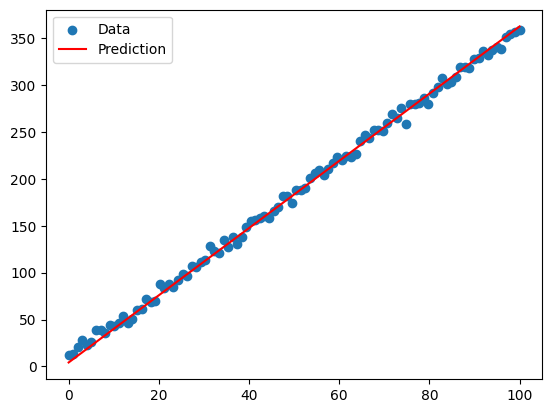

In [12]:
plt.scatter(x, y, label='Data')
plt.plot(x, pred, color='red', label='Prediction')
plt.legend()
plt.show()